In [19]:
import re
import gensim
import logging
import pandas as pd
import urllib.request
from gensim.models import word2vec

In [20]:
def get_Model():  # скачивает с rus_vectores модель
    req = urllib.request.urlretrieve('http://rusvectores.org/static/models/rusvectores2/'
                                     'ruscorpora_mystem_cbow_300_2_2015.bin.gz',
                                     'ruscorpora_mystem_cbow_300_2_2015.bin.gz')
    return

get_Model()

In [27]:
def make_Model():  # делает для скачанной модели word2vec
    m = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'
    if m.endswith('.bin.gz'):  # делает вектора
        model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
    return model

In [91]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

def create_Graph(model):  # ищет слова и близкие к ним в модели
    start_words = ["театр_S", "сцена_S", "актер_S"]
    G = nx.Graph() # пустой граф
    G.add_nodes_from(start_words) # добавляем несколько узлов сразу
    # по модели ищем слова первого порядка для каждого слова списка
    for word in start_words:
        par_speech = re.search(r'_([A-Za-z]+)', word)
        morpho = par_speech.group(1)
        if word in model:
            print(word)
            print(model[word][:10])
            print("--------------")
            for i in model.most_similar(positive=[word], topn=15):
                par_speech2 = re.search(r'_([A-Za-z]+)', i[0])
                morpho2 = par_speech2.group(1)
                if i[1] >= 0.5 and morpho == morpho2:
                    print(i[0], i[1])
                    print("(())")
                  #  G.add_node(i[0])
                    G.add_edge(word, i[0])
                    if i[0] in model:
                        print(i[0])
                        print(model[i[0]][:10])
                        for el in model.most_similar(positive=[i[0]], topn=15):
                            par_speech3 = re.search(r'_([A-Za-z]+)', el[0])
                            morpho3 = par_speech3.group(1)
                            if el[1] >= 0.5 and morpho2 == morpho3:
                                print(el[0], el[1])
                              #  G.add_node(el[0])
                                G.add_edge(i[0], el[0])
            print('\n')
    nx.draw_networkx_nodes(G, pos, node_color='green', node_size=100)
    nx.draw_networkx_edges(G, pos, edge_color='yellow')
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='Arial')
    plt.axis('off')
    plt.show()
    return G

In [104]:
from networkx.algorithms import community

def analysis(G):
    print("Число узлов: ", G.number_of_nodes())
    print("Число ребер: ", G.number_of_edges())
    # Радиус графа, минимальный эксцентриситет среди всех вершин графа
    print("Радиус графа: ", nx.radius(G))

# Диаметр графа, самый длинный путь от одной вершины до другой
    print("Диаметр графа: ", nx.diameter(G))

# Коэффициент ассортативности (насколько вся сеть завязана на основных "хабах"):
    print("Коэффициент ассортативности: ", nx.degree_pearson_correlation_coefficient(G))
    
    print("Коэфициент классетризации: ", nx.average_clustering(G))

# Плотность графа, отношение рёбер и узлов
    print("Плотность графа: ", nx.density(G))
    
    deg_cen = nx.degree_centrality(G)
    for nodeid in sorted(deg_cen, key=deg_cen.get, reverse=True)[:3]:
        print("Центральность узлов по degree centrality: ", nodeid)
    bet_cen = nx.betweenness_centrality(G)
    for nodeid in sorted(bet_cen, key=bet_cen.get, reverse=True)[:3]:
        print("Центральность узлов по betweenness centrality: ", nodeid)
    clos_cen = nx.closeness_centrality(G)
    for nodeid in sorted(clos_cen, key=clos_cen.get, reverse=True)[:3]:
        print("Центральность узлов по closeness centrality: ", nodeid)
    eig_cen = nx.eigenvector_centrality(G)
    for nodeid in sorted(eig_cen, key=eig_cen.get, reverse=True)[:3]:
        print("Центральность узлов по eigenvector centrality: ", nodeid)
    com = community.greedy_modularity_communities(G)
    print(com)

театр_S
[ 0.05735958  0.02279772 -0.01869367  0.04660577  0.04590354  0.03536589
 -0.01915302  0.08155805  0.0798835   0.07132304]
--------------
мхат_S 0.6755560636520386
(())
мхат_S
[ 0.01414966 -0.00357031  0.02065288  0.0748034   0.03701768  0.05863323
  0.03788952  0.06932685  0.1213202   0.08528609]
театр_S 0.6755560636520386
ленком_S 0.6143943667411804
мейерхольд_S 0.5727198719978333
тюз_S 0.5612602233886719
эфрос_S 0.5495337843894958
спектакль_S 0.5440467000007629
студия_S 0.5411021709442139
вахтангов_S 0.5271117091178894
таировский_S 0.5192093253135681
труппа_S 0.5108367800712585
труппа_S 0.6605667471885681
(())
труппа_S
[ 0.0115323   0.02689098 -0.00630232 -0.0549786   0.04597765 -0.00610664
 -0.03454065  0.01586888  0.11768788  0.07008183]
театр_S 0.6605667471885681
спектакль_S 0.6128294467926025
репертуар_S 0.5814101696014404
актер_S 0.5783778429031372
ленком_S 0.531975269317627
артист_S 0.5289832949638367
студия_S 0.5210974812507629
оперетта_S 0.5132284760475159
опера_S 0.

эпизод_S 0.57933509349823
сцена_S 0.5169540643692017
пьеска_S 0.5096392631530762
сюжет_S 0.500633955001831
оперетка_S 0.5163298845291138
(())
оперетка_S
[ 0.02062912  0.13439278 -0.01632968 -0.03446474 -0.02426633  0.04959936
 -0.00550077  0.014769    0.07013949 -0.02240334]
балет_S 0.6275101900100708
оперетта_S 0.6212995052337646
опера_S 0.6149106025695801
водевиль_S 0.5613080859184265
комедия_S 0.5482799410820007
дивертисмент_S 0.5328222513198853
пантомима_S 0.5283482074737549
театр_S 0.5263687968254089
кордебалет_S 0.5235617160797119
спектакль_S 0.5215978622436523
сцена_S 0.5163298845291138
пьеса_S 0.5080047845840454
кармен_S 0.5067837238311768
драма_S 0.5000876188278198


актер_S
[ 0.05524576  0.08403965  0.0941639  -0.02058233  0.03977678  0.03826276
 -0.0034423   0.07174798  0.07930749 -0.03317941]
--------------
артист_S 0.8223255276679993
(())
артист_S
[ 0.05353855  0.06674911  0.09871545 -0.0442351  -0.01402321  0.04759709
  0.02859809  0.01005947  0.10014264  0.02888235]
акте

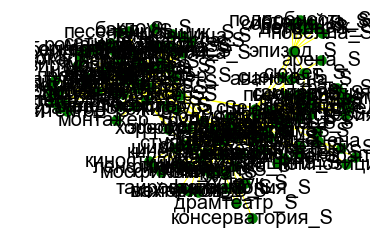

Число узлов:  142
Число ребер:  284
Радиус графа:  3
Диаметр графа:  5
Коэффициент ассортативности:  -0.2763450460062955
Коэфициент классетризации:  0.2741026010937274
Плотность графа:  0.028368794326241134
Центральность узлов по degree centrality:  спектакль_S
Центральность узлов по degree centrality:  артист_S
Центральность узлов по degree centrality:  актриса_S
Центральность узлов по betweenness centrality:  актер_S
Центральность узлов по betweenness centrality:  сцена_S
Центральность узлов по betweenness centrality:  спектакль_S
Центральность узлов по closeness centrality:  актер_S
Центральность узлов по closeness centrality:  спектакль_S
Центральность узлов по closeness centrality:  сцена_S
Центральность узлов по eigenvector centrality:  актер_S
Центральность узлов по eigenvector centrality:  спектакль_S
Центральность узлов по eigenvector centrality:  артист_S


AttributeError: module 'networkx.algorithms.community' has no attribute 'greedy_modularity_communities'

In [105]:
def main():  # запускает функции
    model2vec = make_Model()
    for_words = create_Graph(model2vec)
    gragh_analize = analysis(for_words)
 #   communities = groups(for_words)
    
main()